In [17]:
# 학습 데이터(Training Data)
# 현실 세계에 있는 실제 데이터
# 예측자 혹은 분류자에게 실제 값을 알려주는 역할 수행
import numpy as np

# 학습 데이터

widths = np.array([3.0, 1.0])
lengths = np.array([1.0, 3.0])

# 학습 데이터 살펴봅시다
for index, (width, length) in enumerate(zip(widths, lengths)):
    print("학습데이터 {}, 너비 {}, 길이{}".format(index + 1, width, length))
    
import matplotlib.pyplot as plt

# 시각화를 위한 함수
def show_data(widths, lengths):
    # Scatter Plot
    plt.scatter(widths, lengths, color=("r", "b"))
    plt.xlabel("width")
    plt.ylabel("length")
    
# 기본 방정식 : y = wx


학습데이터 1, 너비 3.0, 길이1.0
학습데이터 2, 너비 1.0, 길이3.0


분류자에 대한 예측치 0.75, 목표치 1.1
분류자에 대한 오차: 0.3500000000000001


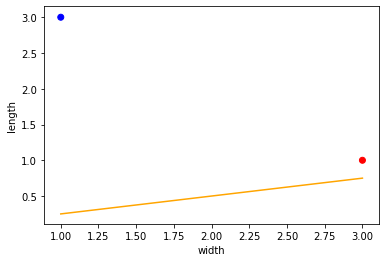

In [45]:
# 기본 가중치 0.25 설정
w = 0.25
# 예측을 위한 공식은 0.25 * x 가 될 것
show_data(widths, lengths)

# 분류선을 긋기 위한 함수 생성
def show_classifier(weight, x):
    r = [x[0], x[1]]
    y_ = [weight * x[0], weight * x[1]]
    plt.plot(r, y_, color="orange")
    
# 초기 가중치로 분류선 그어보기
show_classifier(w, widths)

# 첫 번째 곤충에 대한 예측치 구하기
target = lengths[0] +lengths[0] * 0.1 #목표치
predict = w *widths[0] #예측치
print("분류자에 대한 예측치 {}, 목표치 {}".format(predict, target))
e = target - predict # 오차
print("분류자에 대한 오차:", e)

Delta: 0.1166666666666667
변경된 가중치: 0.3666666666666667


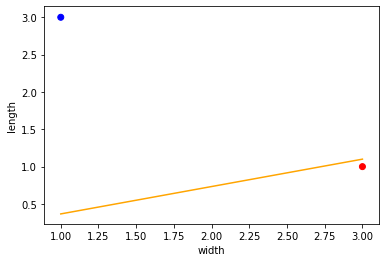

In [46]:
# 델타 구하기
delta = e /widths[0]
print("Delta:", delta)
# 이 델타 값으로 가중치 1차 업데이트
w2 = w +delta # 가중치 1차 업데이트
print("변경된 가중치:", w2)
show_data(widths, lengths)
show_classifier(w2, widths)


분류자에 대한 예측값0.3666666666666667, 목표치2.7
2차 학습에 의한 델타: 2.3333333333333335
2차 갱신된 가중치: 2.7


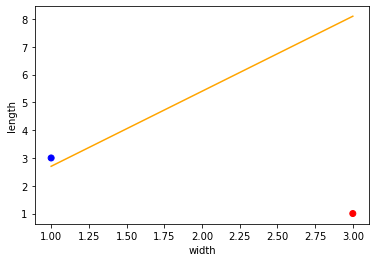

In [48]:
# 두번째 학습 데이터로 학습
target2 = lengths[1] - lengths[1] *0.1 # 목표치를 약간 낮게 설정

predict2 = w2 *widths[1]
# 오차
e2 = target2 - predict2
print("분류자에 대한 예측값{}, 목표치{}".format(predict2, target2))
# delta 구하기
delta2 = e2 / widths[1]
print("2차 학습에 의한 델타:", delta2)

# 가중치 2차 업데이트
w3 = w2 + delta2
print("2차 갱신된 가중치:", w3)

show_data(widths, lengths)
show_classifier(w3, lengths)

분류자에 의한 예측치 0.3666666666666667, 목표치 2.7
학습률 포함 2차 합습에 의한 델타: 1.1666666666666667
갱신된 가중치: 1.5333333333333334


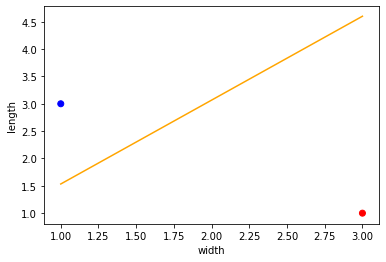

In [54]:
# 한꺼번에 너무 많은 변화가 있었다
# 2차 갱신을 다시 시도
#Learning Rate(학습률) 도입
target2 = lengths[1] - lengths[1]* 0.1
predict2 = w2 *widths[1] # 예측치

e2 = target2 - predict2
print("분류자에 의한 예측치 {}, 목표치 {}".format(predict2, target2))
L = 0.5 # 학습률 : 조정 안했을 때에 비해 1/2을 업데이트
delta2 = L * (e2 /widths[1]) # 학습률 적용 수식
print("학습률 포함 2차 합습에 의한 델타:", delta2)

# 가중치 업데이트
w3 =  w2 +delta2
print("갱신된 가중치:", w3)

show_data(widths, lengths)
show_classifier(w3, lengths)

# 획득한 모델 : y = 1.53 * x

1 번째 학습(Epoch): 가중치 0.5, 오차 1.1666666666666667
2 번째 학습(Epoch): 가중치 1.6666666666666667, 오차 0.0
3 번째 학습(Epoch): 가중치 1.6666666666666667, 오차 0.0
4 번째 학습(Epoch): 가중치 1.6666666666666667, 오차 0.0
5 번째 학습(Epoch): 가중치 1.6666666666666667, 오차 0.0
6 번째 학습(Epoch): 가중치 1.6666666666666667, 오차 0.0
7 번째 학습(Epoch): 가중치 1.6666666666666667, 오차 0.0
8 번째 학습(Epoch): 가중치 1.6666666666666667, 오차 0.0
9 번째 학습(Epoch): 가중치 1.6666666666666667, 오차 0.0
최종 가중치: 1.6666666666666667


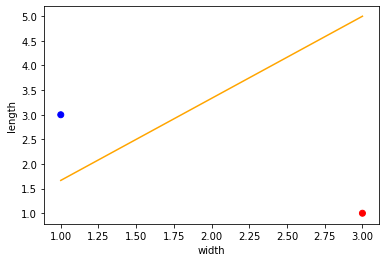

In [58]:
# 약간의 정리
# 실제로는 개별 합슨데이터로 개별 업데이트를 진행하지는 않고
# 전체 데이터를 기반으로 "여러차례" 학습을 진행한다
def train(var, target, w, learning_rate=0.5):
    # var : 값(Feature)
    # target :목표치
    # w 초기 가중치
    # learning_rate :학습률
    for i in range(1, 10): # "여러 차례" 학습을 진행
        e = learning_rate * np.sum((target - w * var) / var)
        print("{} 번째 학습(Epoch): 가중치 {}, 오차 {}".format(i, w, e))
        # 가중치 업데이트
        w += e
    # 최종 학습된 가중치를 반환
    return w

# 학습 시작
classifier = train(widths, lengths, 0.5) # 초기 가중치 0.5, 학습률 0.5
# 학습 이후에 얻어낸 최종 분류자의 가중치
print("최종 가중치:", classifier)
    
show_data(widths, lengths)
show_classifier(classifier, widths)

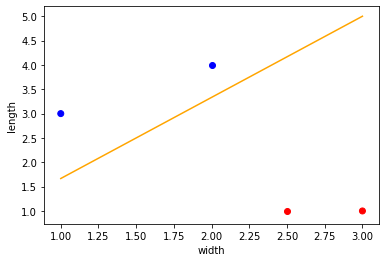

In [66]:
# classifier를 이용해서 선을 그었을 때, 분류선보다 크면 곤충2
# 작으면 곤충1로 구분할 수 있다
def classify(classifier, insect):
    plt.scatter(insect['width'], insect['length'], color ="r" if classifier * insect['width'] - insect['length'] > 0 else "b")
show_data(widths, lengths)
show_classifier(classifier, widths)

# 새로운 관측치의 분류
new_insect = {"width":2.0, "length":4.0}
classify(classifier, new_insect)
classify(classifier, {"width":2.5, "length":1.0})